In [ ]:
!pip install pystan~=2.14

  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
ERROR: Operation cancelled by user


In [ ]:
import yfinance
import datetime as dt

In [ ]:
start = dt.datetime(2020,1,1)
end = dt.datetime.now()
data = yfinance.download("TSLA", start, end)

data.to_csv("Stock_data.csv")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
import pandas as pd
data = pd.read_csv("Stock_data.csv")

In [ ]:
data = data[["Date","Close"]]

In [ ]:
data.columns = ["ds", "y"]

In [ ]:
data

,ds,y
0,2020-01-02,28.684000
1,2020-01-03,29.534000
2,2020-01-06,30.102667
3,2020-01-07,31.270666
4,2020-01-08,32.809334
...,...,...
1001,2023-12-22,252.539993
1002,2023-12-26,256.609985
1003,2023-12-27,261.440002
1004,2023-12-28,253.179993


In [ ]:
from prophet import Prophet

In [ ]:
prophet = Prophet(daily_seasonality=True)
prophet.fit(data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rx6h07y/83dti73e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rx6h07y/0qenoski.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2874', 'data', 'file=/tmp/tmp7rx6h07y/83dti73e.json', 'init=/tmp/tmp7rx6h07y/0qenoski.json', 'output', 'file=/tmp/tmp7rx6h07y/prophet_modelerxvytqn/prophet_model-20240101092104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:21:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:21:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_dates = prophet.make_future_dataframe(periods=365)
predictions = prophet.predict(future_dates)

In [ ]:
from prophet.plot import plot_plotly

plot_plotly(prophet, predictions)

In [ ]:
unknown_data = data.iloc[-90:]
data = data.iloc[:-90]


In [ ]:
prophet = Prophet(daily_seasonality=True)
prophet.fit(data)

future_dates = (prophet.make_future_dataframe(periods=365))
predictions = prophet.predict(future_dates)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rx6h07y/vkx54umu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7rx6h07y/grz6bzpz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23796', 'data', 'file=/tmp/tmp7rx6h07y/vkx54umu.json', 'init=/tmp/tmp7rx6h07y/grz6bzpz.json', 'output', 'file=/tmp/tmp7rx6h07y/prophet_modeln5amjim_/prophet_model-20240101092105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:21:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:21:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
plot_plotly(prophet, predictions)

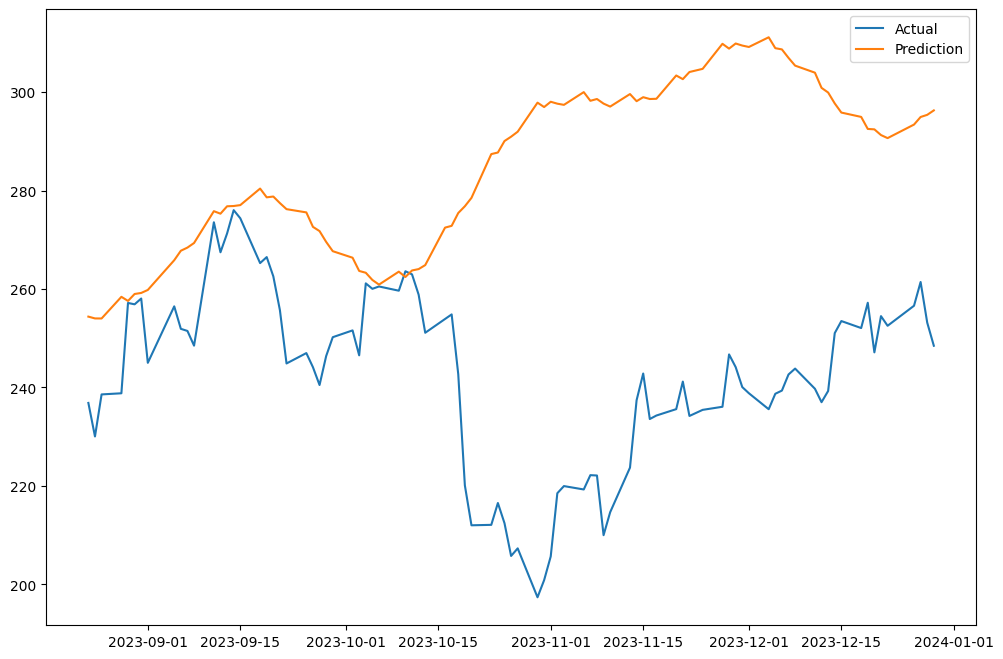

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))


pred = predictions[predictions['ds'].isin(unknown_data['ds'])]

plt.plot(pd.to_datetime(unknown_data['ds']), unknown_data['y'], label="Actual")
plt.plot(pd.to_datetime(unknown_data['ds']), pred['yhat'], label="Prediction")

plt.legend()